100%|██████████| 158345/158345 [00:00<00:00, 1869525.51it/s]


(array([2.909907e+06, 8.504700e+04, 1.250000e+02, 2.300000e+01,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.0000e+00, 2.5580e+02, 5.1060e+02, 7.6540e+02, 1.0202e+03,
        1.2750e+03, 1.5298e+03, 1.7846e+03, 2.0394e+03, 2.2942e+03,
        2.5490e+03]),
 <BarContainer object of 10 artists>)

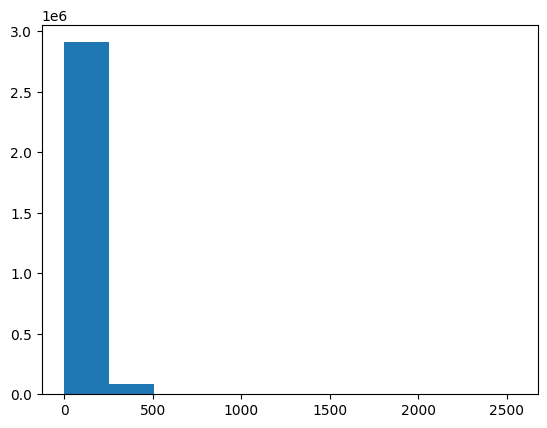

In [4]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import tqdm
path="/home/asr/speech-datasets/indicvoices/artifacts/manifests/internal/verbatim"

jsons = glob.glob(f'{path}/*.json')

lengths = []
for j in jsons:
    df = pd.read_json(j,lines=True, orient='records')
    for t in tqdm.tqdm(df['text']):
        lengths.append(len(t))

plt.hist(lengths)


In [ ]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import tqdm
from joblib import Parallel, delayed

path="/home/asr/speech-datasets/indicvoices/artifacts/manifests/internal/"

jsons = glob.glob(f'{path}/*.json')

def process_json(j):
    with open(j) as reader:
        lines = reader.read().strip().splitlines()
    
    consider = []
    for l in lines:
        jobj = json.loads(l)
        if jobj['text'] <= 800:
            consider.append(l)

    with open(j,'w') as writer:
        print('\n'.join(consider),file=writer)

Parallel(n_jobs=-64,backend='multiprocessing')(
    delayed(process_json)(x) for x in tqdm.tqdm(jsons)
)